Idem que el 1 con cross validation y grid search

In [17]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Dataset: Dos clases aleatorias bidimensionales 

** Una con media en [2, 1] y covarianza [[1, 0.7],[0.7, 1]], la otra con media [1, 3] y covarianza [[1, 0.2],[0.2, 1]]**

In [133]:
#from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal

np.random.seed(32)
size1 = 100
mu1 = [2, 1]
cov1 = [[1, 0.7],[0.7, 1]]

size2 = 100
mu2 = [1, 3]
cov2 = [[1, 0.2],[0.2, 1]]

# Sample classes
xc1 = multivariate_normal(mean=mu1, cov=cov1, size=size1)
xc2 = multivariate_normal(mean=mu2, cov=cov2, size=size2)
X = np.vstack([xc1, xc2])

tc1 = np.ones(xc1.shape[0])
tc2 = np.zeros(xc2.shape[0])
y = np.concatenate([tc1, tc2])

tam_test = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)

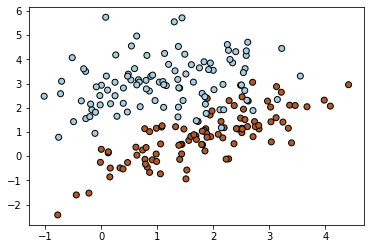

In [134]:
# Veamos cómo se ven
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

In [136]:
#Junto las clases para el entrenamiento. Por ahora sin separar train y test. Para ver los parametros del 
knn = KNeighborsClassifier()

param_grid = {"n_neighbors" : [3, 6, 10, 12, 14, 15, 16, 20, 30]
             } 

# run grid search
for cv in [5, 10, 20, 25]:
    grid_search = GridSearchCV(knn, cv=cv, param_grid=param_grid)
    grid_search.fit( X_train, y_train )
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    print(grid_search.best_score_)
    print(grid_search.cv_results_['mean_test_score'])
    print(grid_search.cv_results_['std_test_score'])

KNeighborsClassifier(n_neighbors=15)
0.9099999999999999
0.9099999999999999
[0.86 0.86 0.88 0.88 0.9  0.91 0.89 0.89 0.88]
[0.10677078 0.11575837 0.11224972 0.09273618 0.10488088 0.0969536
 0.11575837 0.11575837 0.1077033 ]
KNeighborsClassifier(n_neighbors=15)
0.9200000000000002
0.9200000000000002
[0.87 0.87 0.89 0.88 0.91 0.92 0.92 0.89 0.89]
[0.10049876 0.12688578 0.11357817 0.13266499 0.09433981 0.09797959
 0.09797959 0.11357817 0.11357817]
KNeighborsClassifier(n_neighbors=15)
0.9100000000000001
0.9100000000000001
[0.87 0.87 0.89 0.87 0.87 0.91 0.9  0.89 0.89]
[0.17058722 0.1584298  0.14798649 0.18193405 0.18193405 0.16093477
 0.13416408 0.14798649 0.14798649]
KNeighborsClassifier(n_neighbors=15)
0.92
0.92
[0.88 0.88 0.9  0.9  0.89 0.92 0.91 0.91 0.9 ]
[0.17492856 0.16       0.15811388 0.15811388 0.15937377 0.15362291
 0.15620499 0.13928388 0.14142136]


**El mejor clasificador es con 15 vecinos para los distintos valores de de cross validation**

In [137]:
mejor_estimador=grid_search.best_estimator_
y_pred = mejor_estimador.predict(X_test)

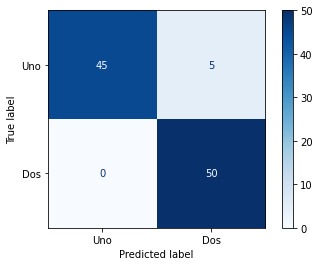

Metricas obtenidas: 
Exactitud = 0.95
Precision = 0.90
f-measure = 0.95


In [138]:
class_names = ["Uno", "Dos"]
disp = plot_confusion_matrix(mejor_estimador, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

plt.show()



cm = confusion_matrix( y_test, y_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

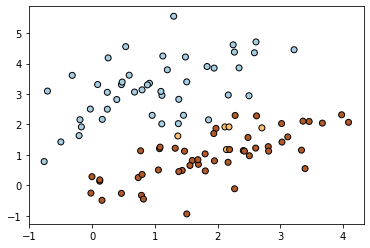

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


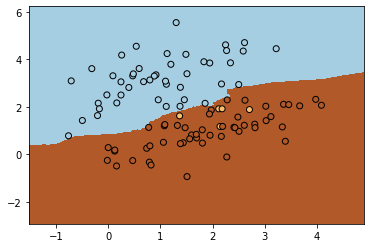

In [139]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred+y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.show()


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = mejor_estimador.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test+y_pred, edgecolors='k', cmap=plt.cm.Paired)
plt.show()